# Homework06

Exercises to practice pandas, data analysis and regression

## Goals

- Understand the effects of pre-processing data
- Get familiar with the ML flow: encode -> normalize -> train -> evaluate
- Understand the difference between regression and classification tasks
- Build an intuition for different regression models

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this homework.

In [ ]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

from data_utils import object_from_json_url
from data_utils import StandardScaler
from data_utils import LinearRegression, SGDRegressor
from data_utils import regression_error

### Load Dataset

Let's load up the full [ANSUR](https://www.openlab.psu.edu/ansur2/) dataset that we looked at briefly in [Week 02](https://github.com/DM-GY-9103-2024F-H/WK02).

This is the dataset that has anthropometric information about U.S. Army personnel.

In [ ]:
# Load Dataset
ANSUR_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/ansur.json"
ansur_data = object_from_json_url(ANSUR_FILE)

# Look at first 2 records
ansur_data[:2]

#### Nested data

This is that *nested* dataset from Week 02.

# 🤔

Let's load it into a `DataFrame` to see what happens.

In [ ]:
# Read into DataFrame
ansur_df = pd.DataFrame.from_records(ansur_data)
ansur_df.head()


# 😓🙄

That didn't work too well. We ended up with objects in our columns.

Luckily, our `DataFrame` library has a function called [`json_normalize()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) that can help.

In [ ]:
# Read into DataFrame
ansur_df = pd.json_normalize(ansur_data)
ansur_df.head()

Much better. `DataFrames` are magic.

#### Data Exploration

Before we start creating models, let's do a little bit of data analysis and get a feeling for the shapes, distributions and relationships of our data.

1. Print `min`, `max` and `average` values for all of the features.
2. Print `covariance` tables for `age`, `ear.length` and `head.circumference`.
3. Plot `age`, `ear.length` and `head.circumference` versus the $1$ *feature* that is most correlated to each of them.

Don't forget to *encode* and *normalize* the data.

In [ ]:
# Work on Data Exploration here

### Encode non-numerical features
ansur_df_num = ansur_df.drop('gender', axis = 1)

# ## 1. Print min, max, avg
for feature in ansur_df_num.columns:
    print("column", feature)
    print("• min:", ansur_df_num[feature].min())
    print("• max:", ansur_df_num[feature].max())
    print("• avg:", ansur_df_num[feature].mean())

### Normalize all data
ansur_encoder = OrdinalEncoder(categories = [['F', "M"]]) #categorical vals
g_vals = ansur_encoder.fit_transform(ansur_df[['gender']].values)
ansur_df[['gender']]=g_vals #set the scaled values
ansur_df.head()

ansur_scalar = StandardScaler() #works numerical vals (and the encoded categorical ones)
scaled_df = ansur_scalar.fit_transform(ansur_df)



# ## 2. Print Covariances
print(scaled_df.head())
print(scaled_df.cov())
    

# ## 3. Plot features most correlated to age, ear length and head circumference
for feature in ['age', 'ear.length', 'head.circumference']:
    print("----", feature,"----")
    highest_correlated = scaled_df.cov().abs()[feature].nlargest(3)[1:]
    print(feature, highest_correlated)
    highest_correlated_feature_names = [val for val in highest_correlated.index.tolist()]
    for cor_feature in highest_correlated_feature_names:
        # do i look at the unscaled or scaled version of the df here?
        plt.scatter(scaled_df[cor_feature], scaled_df[feature], alpha=.1)
        plt.xlabel(cor_feature)
        plt.ylabel(feature)
        plt.show()

    

### Interpretation

<span style="color:hotpink;">
Does anything stand out about these graphs? Or the correlations?<br>
Are correlations symmetric? Does the feature most correlated to ear length also have ear length as its most correlated pair?
</span>


<span style="color:green;">
Age: It's interesting that ear length is correlated with age, I didn't know ears got longer? It makes sense to me that age and weight are correlated.

EarLength: this is correlated with weight and hand breadth. It may be that ear length and weight are both correlated with age which would be their connection, but I'm a little confused why age didn't show up as the most correlated.

Head circumference: this correlation is one of the strongest with head height which makes alot of sense. We see this in the plot as it trends upwards.

The correlations don't seem to be symmetric.
</span>

<span style="color:hotpink;">EDIT THIS CELL WITH ANSWER</span>

### Regression

Now, we want to create a regression model to predict `head.circumference` from the data.

From our [Week 06](https://github.com/PSAM-5020-2025S-A/WK06) notebook, we can create a regression model by following these steps:

1. Load dataset (done! 🎉)
2. Encode label features as numbers (done! ⚡️)
3. Normalize the data (done! 🍾)
4. Separate the outcome variable and the input features
5. Create a regression model using all features
6. Run model on training data and measure error
7. Plot predictions and interpret results
8. Run model on test data, measure error, plot predictions, interpret results

13.910571985204234


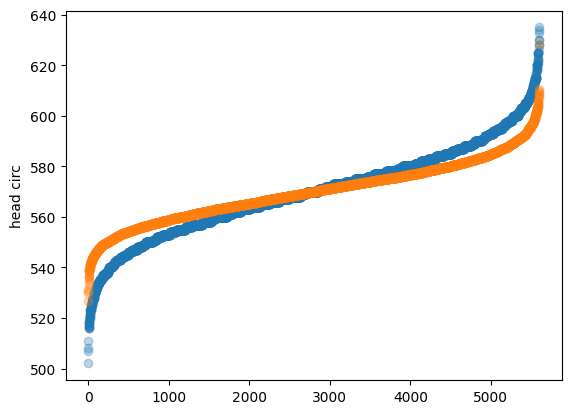

In [77]:
# Work on Regression Model here

## Separate outcome variable and input features
feature_names = [feat for feat in ansur_df if feat !='head.circumference']
features = scaled_df[feature_names]
head_circumferences = scaled_df['head.circumference']

## Create a regression model
model = LinearRegression()
model.fit(features,head_circumferences)

## Measure error on training data
predicted_scaled = model.predict(features)
predicted = ansur_scalar.inverse_transform(predicted_scaled) #unnormalize

## Plot predictions and interpret results
print(regression_error(ansur_df['head.circumference'], predicted['head.circumference']))

# Plot the predictions
original = ansur_df["head.circumference"]
predicted = predicted["head.circumference"]
plt.plot(sorted(original), marker='o', linestyle='', alpha=0.3)
plt.plot(sorted(predicted), marker='o', linestyle='', alpha=0.3)
plt.ylabel("head circ")
plt.show()


In [78]:
## Load Test Data
ANSUR_TEST_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/ansur-test.json"

ansur_test_data = object_from_json_url(ANSUR_TEST_FILE)
ansur_test_df = pd.json_normalize(ansur_test_data)

ansur_test_encoded_df = ansur_test_df.copy()

g_vals = ansur_encoder.transform(ansur_test_df[["gender"]].values)
ansur_test_encoded_df[["gender"]] = g_vals

ansur_test_scaled_df = ansur_scalar.transform(ansur_test_encoded_df)
ansur_test_scaled_df.head()

,age,gender,height,weight,span,stature,ear.breadth,ear.length,ear.protrusion,foot.breadth,foot.length,hand.breadth,hand.length,hand.palm,head.height,head.circumference
0,-1.125304,0.697563,0.452954,-0.727781,-0.123494,0.263447,0.270940,0.489559,-0.716543,0.022439,-0.056985,0.324677,0.499217,-0.128919,0.491695,-0.821259
1,1.068641,-1.433562,-1.356093,-1.113032,-0.988637,-1.457006,-0.973228,-0.132009,-1.664859,-1.030966,-0.803796,-1.091728,-0.283552,-0.269102,-0.183119,-0.821259
2,-0.778892,0.697563,-0.322352,-0.727781,0.318090,0.119151,1.515107,0.075180,-0.716543,-0.429021,0.689826,0.796812,1.108038,1.132731,0.744751,-0.166993
3,0.260345,0.697563,0.194519,0.161260,0.354138,0.174650,-1.284270,0.489559,0.547878,0.473898,0.115356,0.324677,0.238294,0.431814,-0.436174,0.868927
4,-1.125304,0.697563,1.486695,-0.135087,1.111138,1.195822,0.581982,0.903938,2.760615,0.925357,0.804720,-0.147458,0.760141,0.992547,-1.364043,-0.766737


error, 14.473238058423496


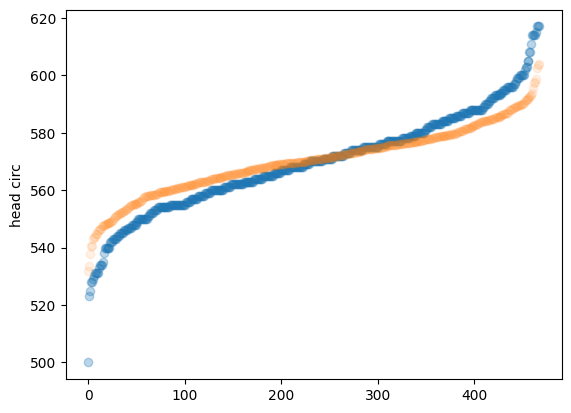

In [79]:
## Run model on test data
predicted_scaled = model.predict(ansur_test_scaled_df[feature_names])
predicted = ansur_scalar.inverse_transform(predicted_scaled) #unnormalize


## Measure error on test data
error = regression_error(ansur_test_df['head.circumference'], predicted['head.circumference'])
print('error,',error)

## Plot predictions and interpret results
original = ansur_test_df["head.circumference"]
predicted = predicted["head.circumference"]
plt.plot(sorted(original), marker='o', linestyle='', alpha=0.3)
plt.plot(sorted(predicted), marker='o', linestyle='', alpha=0.1)
plt.ylabel("head circ")
plt.show()

### Interpretation

<span style="color:hotpink;">
How well does your model perform?<br>
How could you improve it?<br>
Are there ranges of circumferences that don't get predicted well?
</span>

<span style="color:hotpink;">The model performed well, we can see that the training error is a little lower than the test error, but its not so much that I would suspect overfitting. I wonder if only using the more correlated values could lead to a better model. Do things like age just add noise, etc? The circumference is predicted relatively well for more middle ranged valuesm but does less good on outliers.</span>